### Mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing required libraries

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=fa0093396ee578aaaaecad931db8637ec89d1a66a1a149ba0933d7d3f4110ebc
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [2]:
pip install shap --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 5.6 MB/s eta 0:00:00


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from lime import lime_tabular
import shap

### Dataset preprocessing

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CAPSTONE/df.csv")
df.head(10)

,0,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),Class,theft
0,0,22.035977,3.586221,0.000000,0.0,4.589925,8.1892,136.585903,123.999076,3.33988,9.246947,FullServiceRestaurant,Normal
1,1,14.649757,0.000000,0.000000,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal
2,2,14.669567,0.000000,0.000000,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal
3,3,14.677808,0.000000,0.000000,0.0,1.529975,7.4902,3.931932,0.000000,3.33988,0.592052,FullServiceRestaurant,Normal
4,4,14.824794,0.000000,0.000000,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal
5,5,22.182649,3.586221,0.013197,0.0,4.589925,8.1892,130.564942,121.623185,8.34970,0.592057,FullServiceRestaurant,Normal
6,6,38.131845,3.586221,0.007371,0.0,9.179851,19.4245,140.435454,117.967915,16.69940,5.768139,FullServiceRestaurant,Normal
7,7,45.597278,3.586221,0.007450,0.0,9.179851,26.9147,135.456017,105.213458,25.04910,5.193459,FullServiceRestaurant,Normal
8,8,45.603647,3.586221,0.000000,0.0,9.179851,26.9147,145.575077,106.407810,33.39880,5.768467,FullServiceRestaurant,Normal
9,9,38.113761,3.586221,0.000000,0.0,9.179851,19.4245,147.695901,116.879014,25.04910,5.767787,FullServiceRestaurant,Normal


In [3]:
df = df.drop(df.columns[0], axis = 1)
df = df[df['Class'] != '0']

In [4]:
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])
df['theft'] = label_encoder.fit_transform(df['theft'])

In [5]:
columns_to_scale = df.columns[:-2]
scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [6]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.80, random_state = 50)

In [10]:
ET_classifier = ExtraTreesClassifier()
ET_classifier.fit(X_train, Y_train)
y_pred = ET_classifier.predict(X_test)

### LIME

In [ ]:
explainer_lime = lime_tabular.LimeTabularExplainer(training_data = X_train.values, feature_names = X_train.columns, verbose = True, mode = 'classification')

In [ ]:
i = 10
k = 5
exp_lime = explainer_lime.explain_instance(X_test.values[i], ET_classifier.predict_proba, num_features = k)
exp_lime.show_in_notebook()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


Intercept 0.23733687688663443
Prediction_local [0.27532492]
Right: 0.0


In [ ]:
print(Y_test[10])

0


In [ ]:
i = 45
k = 8
exp_lime = explainer_lime.explain_instance(X_test.values[i], ET_classifier.predict_proba, num_features = k)
exp_lime.show_in_notebook()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


Intercept 0.22608413769353664
Prediction_local [0.28153495]
Right: 0.0


In [ ]:
print(Y_test.values[45])

2


### SHAP

In [8]:
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train, Y_train)
y_pred = DT_classifier.predict(X_test)

In [9]:
explainer = shap.Explainer(DT_classifier)

In [10]:
shap_values = explainer(X_test[:10000])

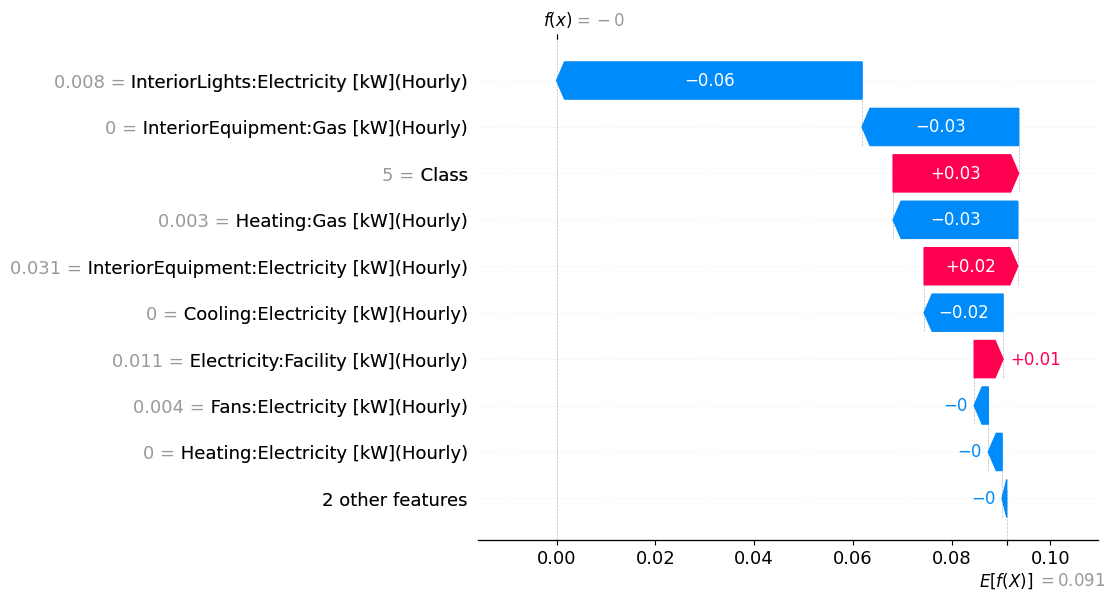

In [29]:
id_to_explain = 0
output_to_explain = 1
shap.plots.waterfall(shap_values[id_to_explain, :, output_to_explain])

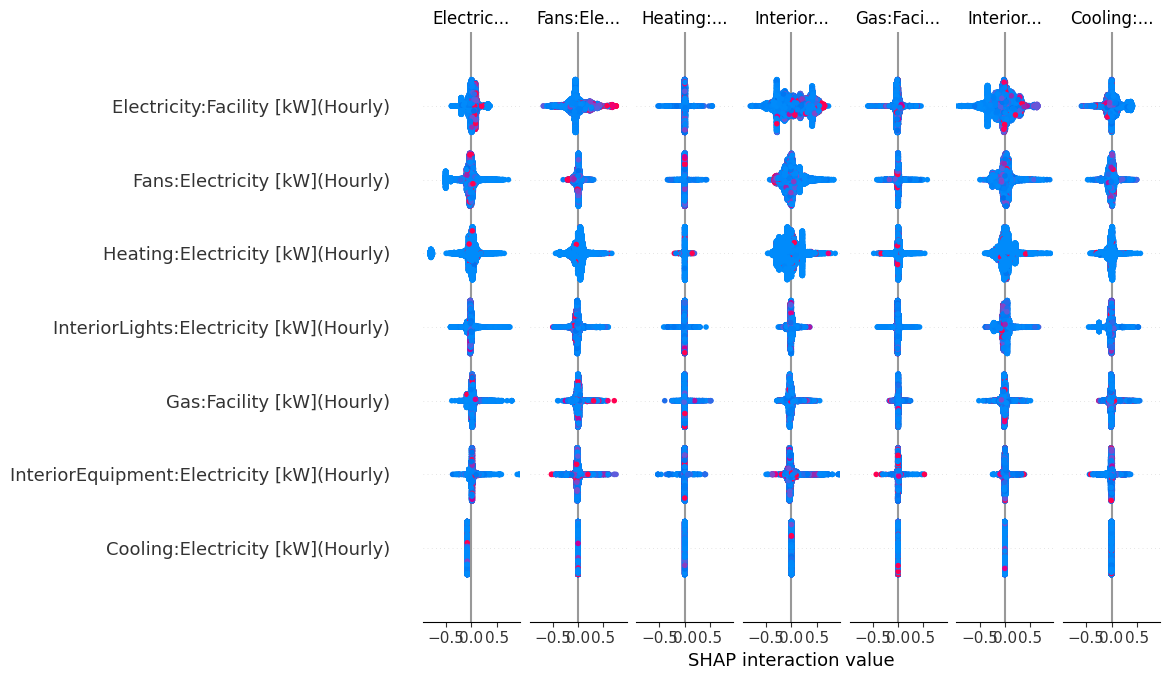

In [37]:
shap.summary_plot(shap_values, X_test[:10000], plot_type = "bar")